# Cryptocurrency Data - Exploratory Data Analysis
## Visualizations and Statistical Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (15, 8)

# Load processed data
df = pd.read_csv('crypto_data_processed.csv')
df['Date'] = pd.to_datetime(df['Date'])

print(f"Dataset loaded: {df.shape}")
print(f"Cryptocurrencies: {df['Symbol'].nunique()}")

Dataset loaded: (2144, 199)
Cryptocurrencies: 1


## 1. Price Analysis

KeyError: 'MA_7'

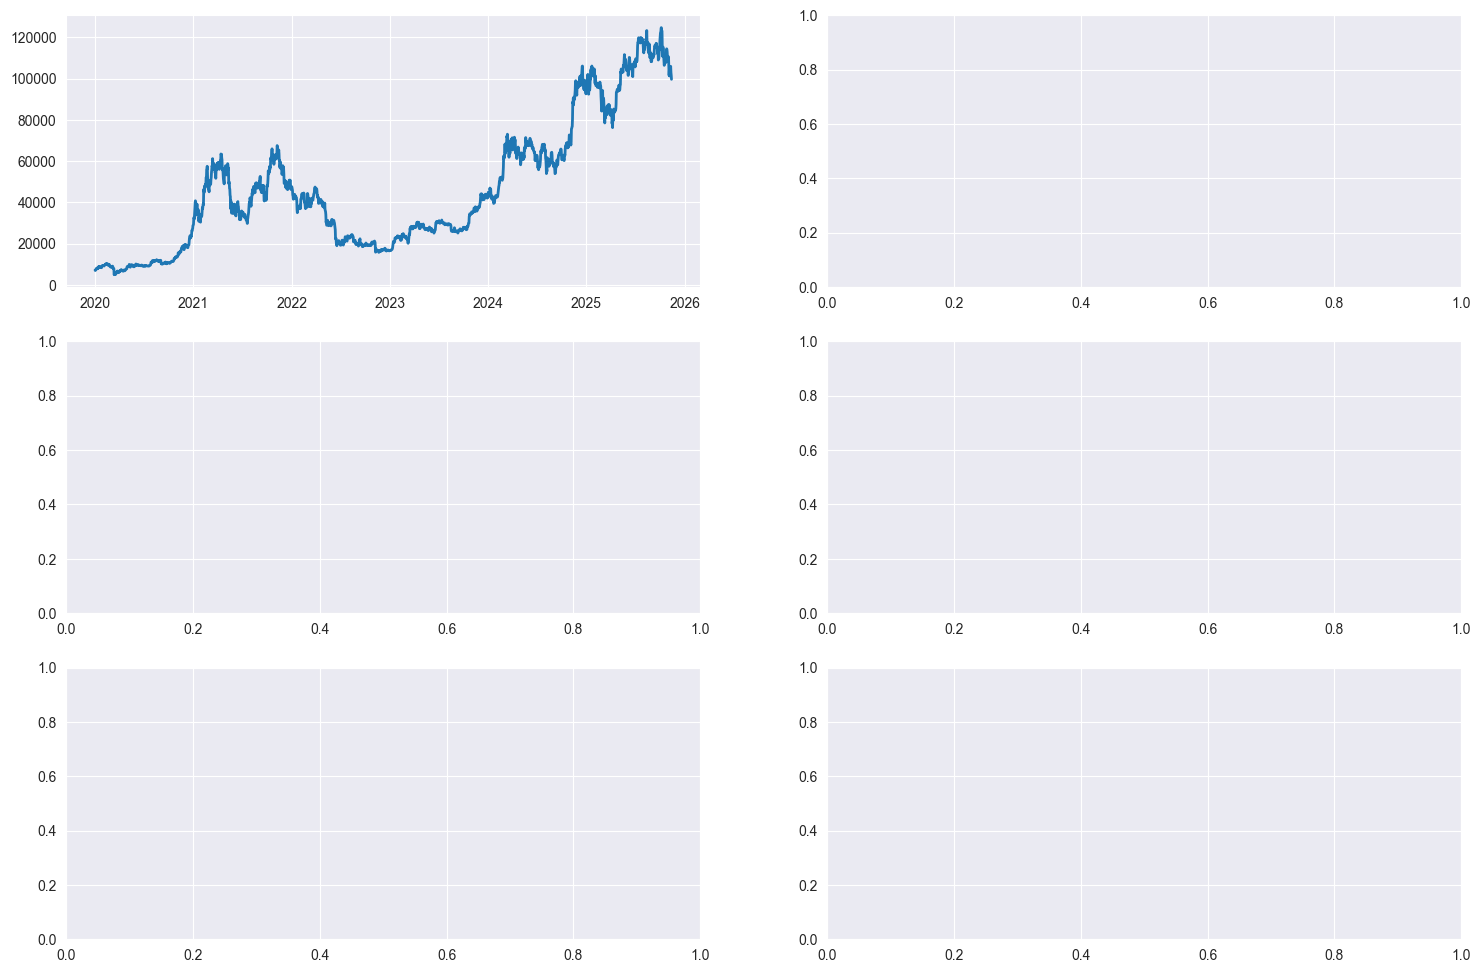

In [3]:
# Price trends over time for top cryptocurrencies
top_coins = df.groupby('Symbol')['Marketcap'].max().nlargest(5).index

fig, axes = plt.subplots(3, 2, figsize=(18, 12))
axes = axes.flatten()

for idx, coin in enumerate(top_coins):
    coin_data = df[df['Symbol'] == coin].sort_values('Date')
    
    axes[idx].plot(coin_data['Date'], coin_data['Close'], label='Close', linewidth=2)
    axes[idx].plot(coin_data['Date'], coin_data['MA_7'], label='MA_7', alpha=0.7)
    axes[idx].plot(coin_data['Date'], coin_data['MA_30'], label='MA_30', alpha=0.7)
    axes[idx].set_title(f'{coin} Price Trend', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Date')
    axes[idx].set_ylabel('Price')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

# Overall distribution
axes[5].hist(df['Price_Change_Pct'], bins=50, edgecolor='black', alpha=0.7)
axes[5].set_title('Overall Price Change Distribution', fontsize=14, fontweight='bold')
axes[5].set_xlabel('Price Change %')
axes[5].set_ylabel('Frequency')
axes[5].axvline(0, color='red', linestyle='--', linewidth=2)

plt.tight_layout()
plt.savefig('price_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## 2. Volume Analysis

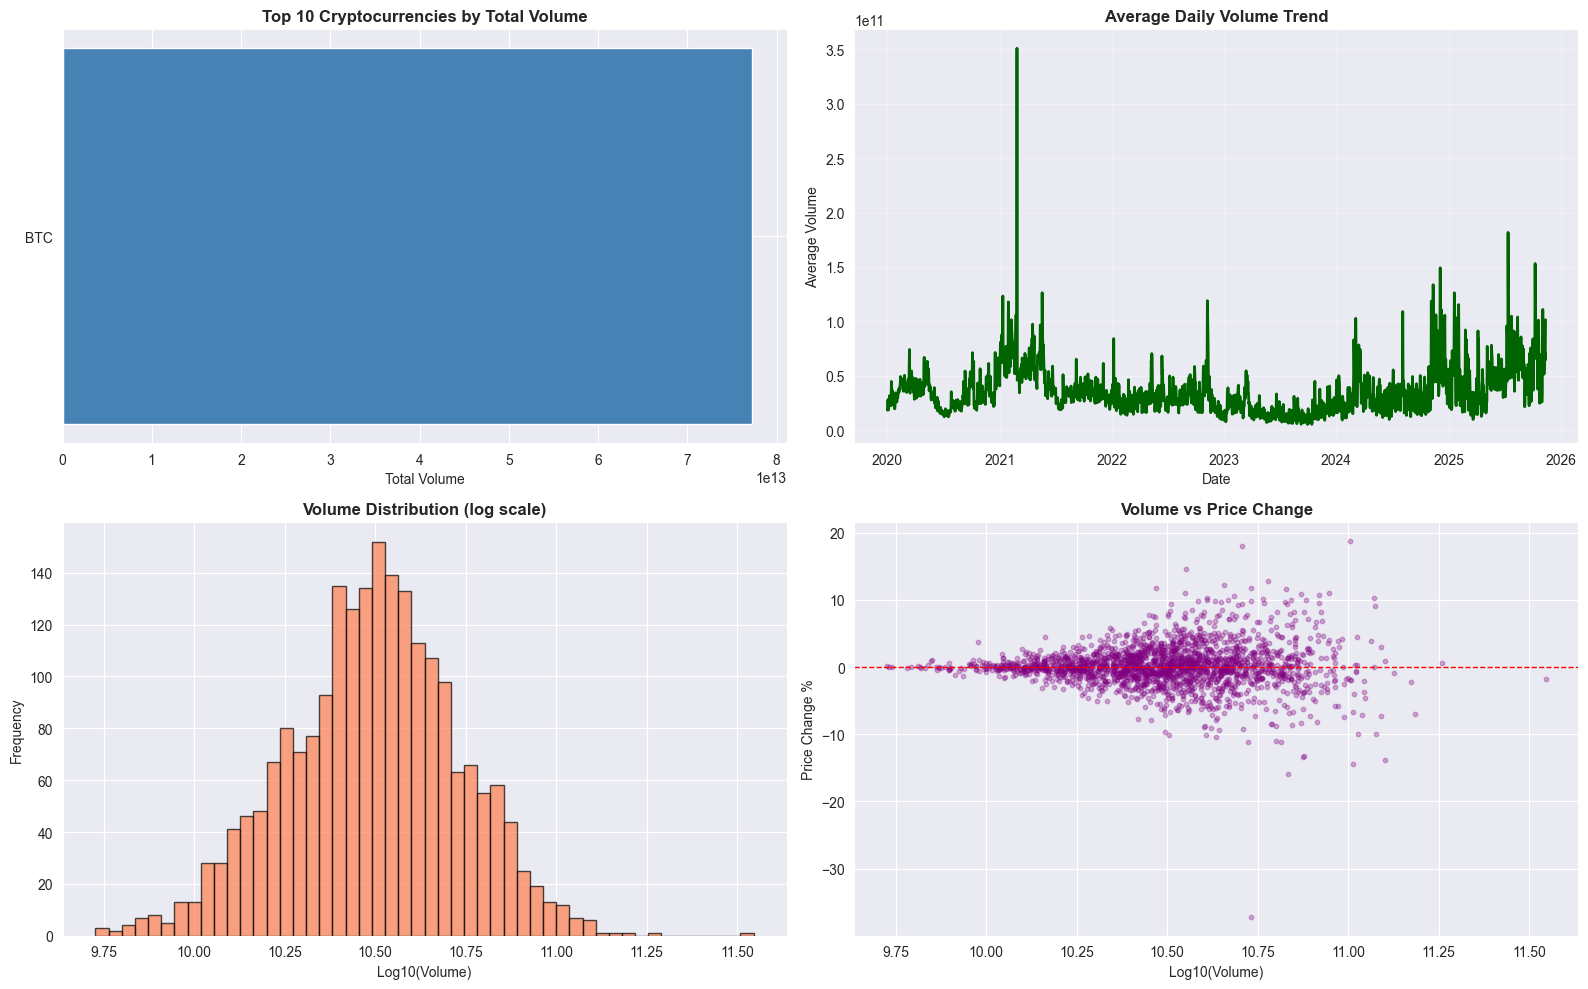

In [4]:
# Volume analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Total volume by coin
total_volume = df.groupby('Symbol')['Volume'].sum().nlargest(10)
axes[0, 0].barh(total_volume.index, total_volume.values, color='steelblue')
axes[0, 0].set_title('Top 10 Cryptocurrencies by Total Volume', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Total Volume')

# Average volume over time
daily_volume = df.groupby('Date')['Volume'].mean()
axes[0, 1].plot(daily_volume.index, daily_volume.values, color='darkgreen', linewidth=2)
axes[0, 1].set_title('Average Daily Volume Trend', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Average Volume')
axes[0, 1].grid(True, alpha=0.3)

# Volume distribution
axes[1, 0].hist(np.log10(df['Volume'] + 1), bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Volume Distribution (log scale)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Log10(Volume)')
axes[1, 0].set_ylabel('Frequency')

# Volume vs Price Change
sample = df.sample(min(10000, len(df)))
axes[1, 1].scatter(np.log10(sample['Volume'] + 1), sample['Price_Change_Pct'], 
                   alpha=0.3, s=10, color='purple')
axes[1, 1].set_title('Volume vs Price Change', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Log10(Volume)')
axes[1, 1].set_ylabel('Price Change %')
axes[1, 1].axhline(0, color='red', linestyle='--', linewidth=1)

plt.tight_layout()
plt.savefig('volume_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## 3. Volatility Analysis

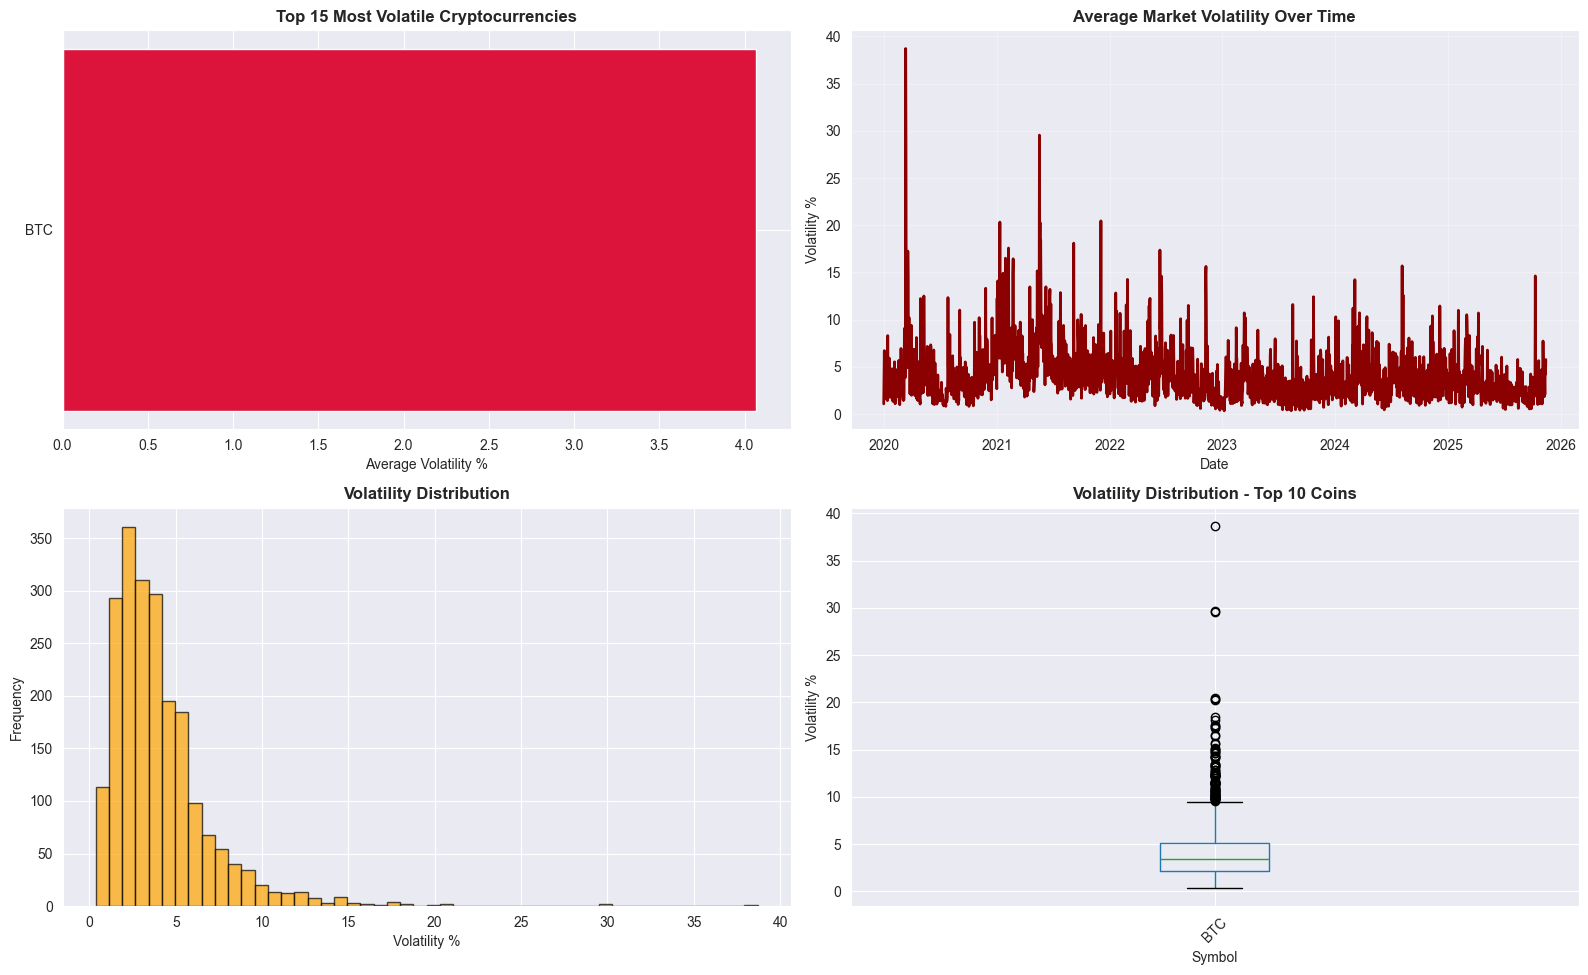

In [5]:
# Volatility analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Average volatility by coin
avg_volatility = df.groupby('Symbol')['Volatility'].mean().nlargest(15)
axes[0, 0].barh(avg_volatility.index, avg_volatility.values, color='crimson')
axes[0, 0].set_title('Top 15 Most Volatile Cryptocurrencies', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Average Volatility %')

# Volatility over time
daily_volatility = df.groupby('Date')['Volatility'].mean()
axes[0, 1].plot(daily_volatility.index, daily_volatility.values, color='darkred', linewidth=2)
axes[0, 1].set_title('Average Market Volatility Over Time', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Volatility %')
axes[0, 1].grid(True, alpha=0.3)

# Volatility distribution
axes[1, 0].hist(df['Volatility'], bins=50, color='orange', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Volatility Distribution', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Volatility %')
axes[1, 0].set_ylabel('Frequency')

# Box plot of volatility by top coins
top_10_coins = df.groupby('Symbol')['Marketcap'].max().nlargest(10).index
df_top = df[df['Symbol'].isin(top_10_coins)]
df_top.boxplot(column='Volatility', by='Symbol', ax=axes[1, 1], rot=45)
axes[1, 1].set_title('Volatility Distribution - Top 10 Coins', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Symbol')
axes[1, 1].set_ylabel('Volatility %')
plt.suptitle('')

plt.tight_layout()
plt.savefig('volatility_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. Correlation Analysis

In [ ]:
# Correlation heatmap
numeric_cols = ['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap', 
                'Price_Change_Pct', 'Volatility', 'MA_7', 'MA_14', 'MA_30']
corr_cols = [col for col in numeric_cols if col in df.columns]

correlation = df[corr_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Print strong correlations
print("\nStrong Correlations (|r| > 0.7):")
for i in range(len(correlation.columns)):
    for j in range(i+1, len(correlation.columns)):
        if abs(correlation.iloc[i, j]) > 0.7:
            print(f"{correlation.columns[i]} <-> {correlation.columns[j]}: {correlation.iloc[i, j]:.3f}")

## 5. Market Cap Analysis

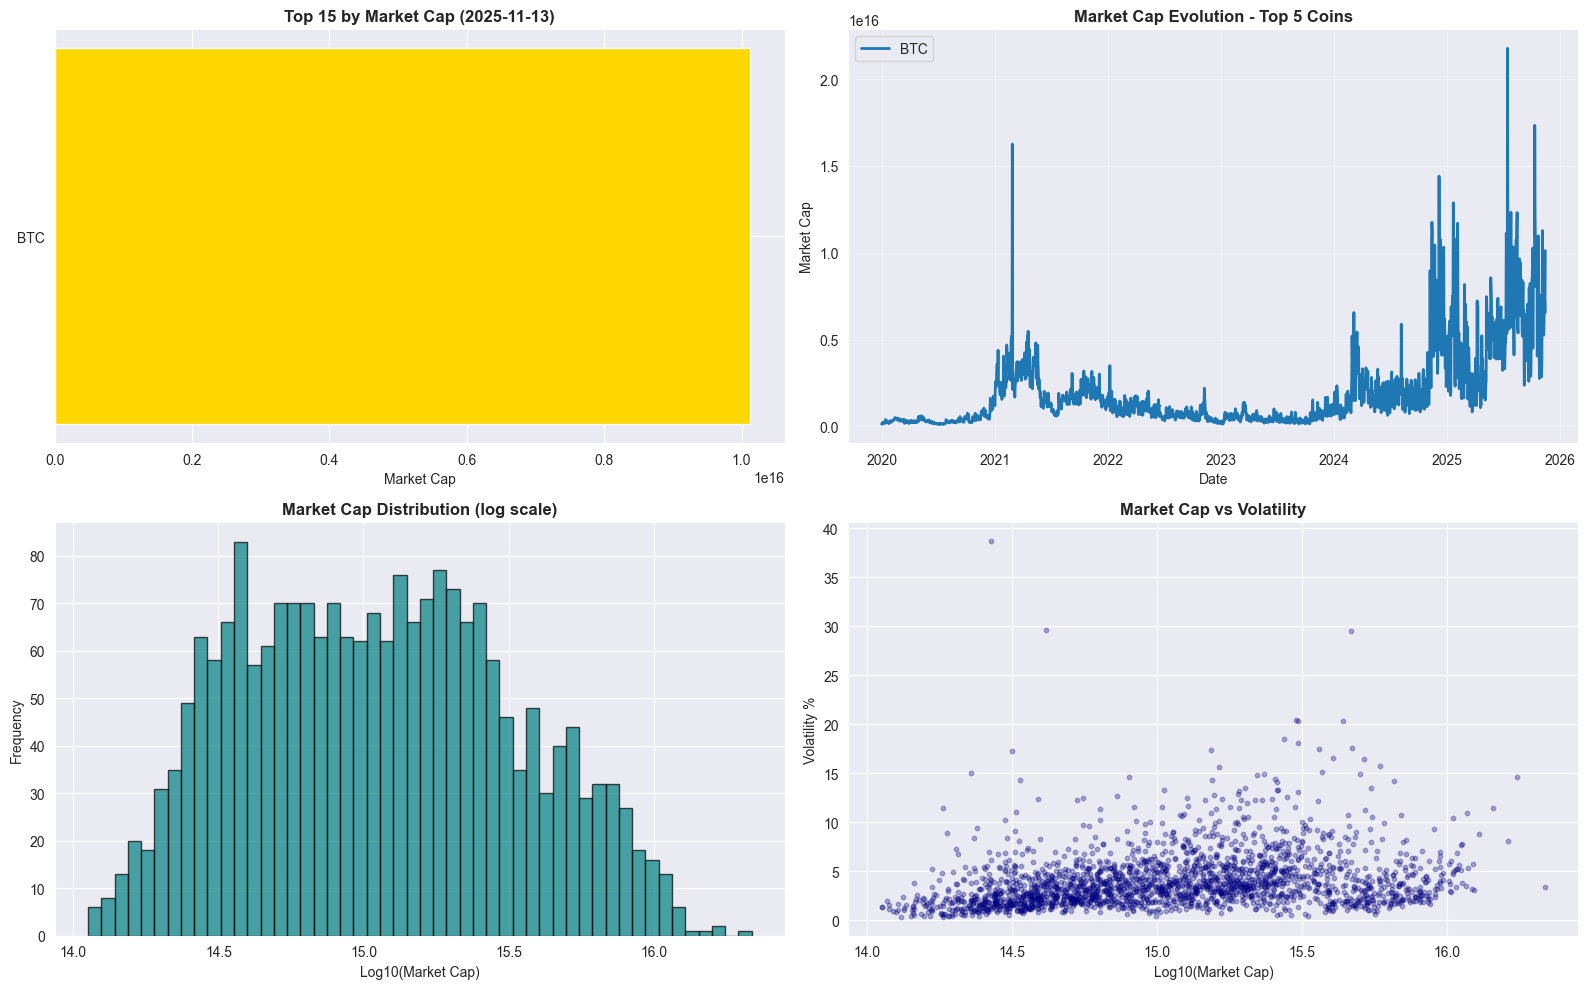

In [7]:
# Market cap analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Top coins by market cap
latest_date = df['Date'].max()
latest_data = df[df['Date'] == latest_date].nlargest(15, 'Marketcap')
axes[0, 0].barh(latest_data['Symbol'], latest_data['Marketcap'], color='gold')
axes[0, 0].set_title(f'Top 15 by Market Cap ({latest_date.date()})', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Market Cap')

# Market cap growth over time
for coin in top_coins[:5]:
    coin_data = df[df['Symbol'] == coin].sort_values('Date')
    axes[0, 1].plot(coin_data['Date'], coin_data['Marketcap'], label=coin, linewidth=2)
axes[0, 1].set_title('Market Cap Evolution - Top 5 Coins', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Market Cap')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Market cap distribution
axes[1, 0].hist(np.log10(df['Marketcap'] + 1), bins=50, color='teal', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Market Cap Distribution (log scale)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Log10(Market Cap)')
axes[1, 0].set_ylabel('Frequency')

# Market cap vs volatility
sample = df.sample(min(10000, len(df)))
axes[1, 1].scatter(np.log10(sample['Marketcap'] + 1), sample['Volatility'], 
                   alpha=0.3, s=10, color='navy')
axes[1, 1].set_title('Market Cap vs Volatility', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Log10(Market Cap)')
axes[1, 1].set_ylabel('Volatility %')

plt.tight_layout()
plt.savefig('marketcap_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## 6. Statistical Summary

In [6]:
# Generate comprehensive statistics
print("=" * 80)
print("CRYPTOCURRENCY MARKET STATISTICS")
print("=" * 80)

print(f"\nDataset Overview:")
print(f"  Total Records: {len(df):,}")
print(f"  Unique Cryptocurrencies: {df['Symbol'].nunique()}")
print(f"  Date Range: {df['Date'].min().date()} to {df['Date'].max().date()}")
print(f"  Trading Days: {df['Date'].nunique()}")

print(f"\nPrice Statistics:")
print(f"  Average Close Price: ${df['Close'].mean():,.2f}")
print(f"  Median Close Price: ${df['Close'].median():,.2f}")
print(f"  Highest Price: ${df['Close'].max():,.2f} ({df.loc[df['Close'].idxmax(), 'Symbol']})")
print(f"  Average Daily Change: {df['Price_Change_Pct'].mean():.2f}%")
print(f"  Positive Days: {(df['Price_Change_Pct'] > 0).sum() / len(df) * 100:.2f}%")

print(f"\nVolatility Statistics:")
print(f"  Average Volatility: {df['Volatility'].mean():.2f}%")
print(f"  Most Volatile: {df.groupby('Symbol')['Volatility'].mean().idxmax()} "
      f"({df.groupby('Symbol')['Volatility'].mean().max():.2f}%)")
print(f"  Least Volatile: {df.groupby('Symbol')['Volatility'].mean().idxmin()} "
      f"({df.groupby('Symbol')['Volatility'].mean().min():.2f}%)")

print(f"\nVolume Statistics:")
print(f"  Total Volume: ${df['Volume'].sum():,.0f}")
print(f"  Average Daily Volume: ${df['Volume'].mean():,.0f}")
print(f"  Highest Volume Day: {df.loc[df['Volume'].idxmax(), 'Date'].date()} "
      f"({df.loc[df['Volume'].idxmax(), 'Symbol']})")

print(f"\nMarket Cap Statistics:")
print(f"  Average Market Cap: ${df['Marketcap'].mean():,.0f}")
print(f"  Largest Market Cap: ${df['Marketcap'].max():,.0f} ({df.loc[df['Marketcap'].idxmax(), 'Symbol']})")

print("\n" + "=" * 80)

CRYPTOCURRENCY MARKET STATISTICS

Dataset Overview:
  Total Records: 2,144
  Unique Cryptocurrencies: 1
  Date Range: 2020-01-01 to 2025-11-13
  Trading Days: 2144

Price Statistics:
  Average Close Price: $46,250.47
  Median Close Price: $39,101.50
  Highest Price: $124,752.53 (BTC)
  Average Daily Change: 0.17%
  Positive Days: 51.26%

Volatility Statistics:
  Average Volatility: 4.07%
  Most Volatile: BTC (4.07%)
  Least Volatile: BTC (4.07%)

Volume Statistics:
  Total Volume: $77,255,274,109,445
  Average Daily Volume: $36,033,243,521
  Highest Volume Day: 2021-02-26 (BTC)

Market Cap Statistics:
  Average Market Cap: $1,951,608,981,208,195
  Largest Market Cap: $21,782,254,409,241,592 (BTC)

